In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from linna.main import ml_sampler
from linna.util import *
%load_ext autoreload
%autoreload 2 
%matplotlib inline 

In this notebook, we sample a 2d gaussian posterior using LINNA. LINNA isn't designed for low dimension posteiors, so the performance will not be great. However, this notebook illustrates how one can use LINNA to sample posteriors. 

# Create a multivariate gaussian distribution 

In [2]:
ndim = 2
init =  np.random.uniform(size=ndim)
#mean value 
means = np.array([0.1, 1])

ndim = len(init)
#covariance matrix 
cov = np.diag([0.5, 0.2])
#Prior, Theory, and likelihood

priors = []
for i in range(ndim):
    priors.append({
        'param': 'test_{0}'.format(i),
        'dist': 'flat',
        'arg1': -2,
        'arg2':2
    })

def theory(x, outdirs):
    x_new = deepcopy(x[1])
    return x_new

# Perform MCMC sampling using Linna

In [3]:
nwalkers = 4 #Number of mcmc walker
pool = None

In [4]:
outdir = os.path.abspath(os.getcwd())+"/out/2dgaussian/"
gpunode = None
chain, logprob = ml_sampler(outdir, theory, priors, means, cov, init, pool, nwalkers, gpunode, nepoch=101)

####################################################################################################
iteration: 0
####################################################################################################


Initialising ensemble of 4 walkers...
Sampling progress :   1%|          | 5100/1000000 [02:27<7:59:05, 34.61it/s] 

####################################################################################################
iteration: 1


####################################################################################################


Initialising ensemble of 4 walkers...
Sampling progress :   0%|          | 1000/1000000 [00:31<8:47:54, 31.54it/s]

####################################################################################################
iteration: 2


####################################################################################################


Initialising ensemble of 4 walkers...
Sampling progress :   0%|          | 1600/1000000 [00:46<8:07:56, 34.10it/s]

####################################################################################################
iteration: 3


####################################################################################################


Initialising ensemble of 4 walkers...
Sampling progress :   0%|          | 2700/1000000 [01:20<8:13:46, 33.66it/s] 


# Check the result

In [5]:
chain_ref =  np.random.multivariate_normal(means, cov, len(chain)) #Reference point

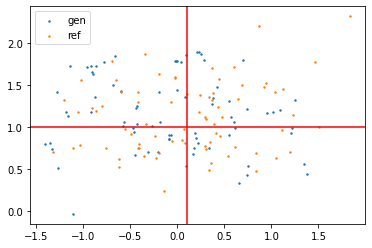

In [6]:
plt.scatter(chain[:,0], chain[:,1], label="gen",s=2)
plt.scatter(chain_ref[:,0], chain_ref[:,1], label="ref", s=2)
plt.legend()
plt.axvline(means[0], c="r")
plt.axhline(means[1], c="r")


# Useful performance check tools

The output of linna has the following struture.

In [2]:
path = os.path.abspath(os.getcwd())+"/out/2dgaussian/"
!tree $path

/home/users/chto/code/lighthouse/python/nnacc/nnacc/linna/linna/docs/notebooks/out/2dgaussian/
├── iter_0
│   ├── best.pth.tar
│   ├── finish.pkl
│   ├── last.pth.tar
│   ├── lr.npy
│   ├── lr_tunning.png
│   ├── model_args.pkl
│   ├── model_pickle.pkl
│   ├── train
│   ├── training_progress.png
│   ├── trainniing.png
│   ├── train_samples_x.txt
│   ├── train_samples_y.npy
│   ├── val
│   ├── val_samples_x.txt
│   ├── val_samples_y.npy
│   ├── X_transform.pkl
│   ├── y_invtransform_data.pkl
│   ├── y_invtransform.pkl
│   ├── y_transform_data.pkl
│   ├── y_transform.pkl
│   └── zeus_256.h5
├── iter_1
│   ├── best.pth.tar
│   ├── finish.pkl
│   ├── last.pth.tar
│   ├── lr.npy
│   ├── lr_tunning.png
│   ├── model_args.pkl
│   ├── model_pickle.pkl
│   ├── train
│   ├── training_progress.png
│   ├── trainniing.png
│   ├── train_samples_x.txt
│   ├── train_samples_y.npy
│   ├── val
│   ├── val_samples_x.txt
│   ├── val_samples_y.npy
│   ├── X_transform.pkl
│   ├── y_invtransform_data.pkl
│  

In each iteration, 

* `training_progress.png`: traning loss and validation loss as a function of training steps. 

* `last.pth.tar` and `best.pth.tar`: files store the weights of the neural network corresponding to the last step and the step corresponds to the minimal validation loss respectively. 

* `train_samples_x.txt` and `train_samples_y.npy`: files contain the training points and the corresponding model evaluations at those points. 

* `val_samples_x.txt` and `val_samples_y.npy`: files contain the validation points and the corresponding model evaluations at those points. 

* `*transform*.pkl`: corresponds to various transform of the data vector as described in the paper. 

Note that if your job crashs at an iteration, LINNA can be restarted from the previous iteration by cleanining the directories corresponding to the crashed iteration and rerunning the code. 

In [3]:
model = retrieve_model_wrapper_in(path+"iter_3/", no_grad=False)

In [4]:
indata=torch.from_numpy(np.array([2,2]).astype(np.float32)).clone().requires_grad_()
print("input:{0}, model prediction:{1}".format(indata, model(indata)))

input:tensor([2., 2.], requires_grad=True), model prediction:tensor([[2.0062, 2.0018]], grad_fn=<MulBackward0>)


In [7]:
print("gradient of model[0] at {0} is {1}".format(indata, torch.autograd.grad(model(indata)[0][0],indata)))

gradient of model[0] at tensor([2., 2.], requires_grad=True) is (tensor([0.9571, 0.0450]),)
